In [1]:
import sys

sys.path.append("../")

import jax
import jax.numpy as jnp
from jax import random
from functools import partial
import chex
from neat_jax import Network, ActivationState, make_network, plot_network, Mutations

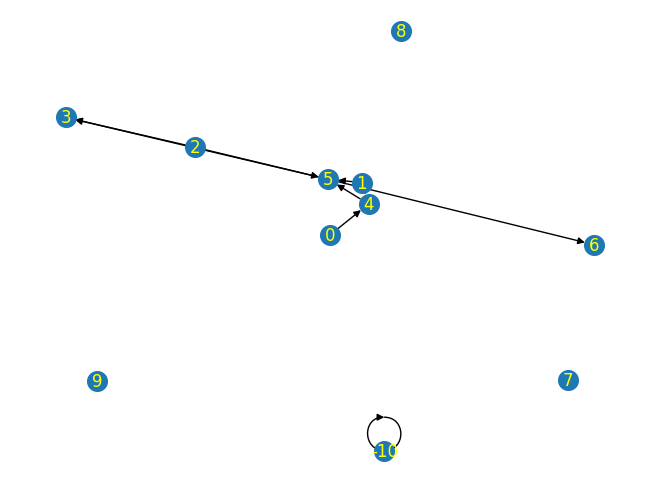

In [2]:
max_nodes = 10
key = jax.random.PRNGKey(0)

init_params = {
    "max_nodes": max_nodes,
    "senders": jnp.array([0, 1, 1, 2, 2, 4, 5, 5]),
    "receivers": jnp.array([4, 4, 5, 3, 5, 5, 3, 6]),
    "weights": jnp.array([1, 1, 1, 1, 1, 1, 1, 1]),
    "activation_indices": jnp.array([0, 0, 0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1, 1, 2]),
    "inputs": jnp.array([0.4, 0.3, 0.5]),
    "output_size": 2,
}

activation_state, net = make_network(**init_params)

plot_network(net)

In [3]:
net.weights

Array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0.], dtype=float32)

In [4]:
net

node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 1 2 3 3 3]
activation_indices: [0 0 0 0 0 0 0 0 0 0]
weights: [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
senders: [  0   1   1   2   2   4   5   5 -10 -10]
receivers: [  4   4   5   3   5   5   3   6 -10 -10]
output_size: 2


In [21]:
topology_config_0 = {
    "max_nodes": 10,
    "senders": jnp.array([0, 1, 2, 4]),
    "receivers": jnp.array([4, 4, 3, 3]),
    "weights": jnp.array([1, 1, 1, 1]),
    "activation_indices": jnp.array([0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1]),
    "inputs": jnp.array([0.5, 0.8, 0.2]),
    "output_size": 1,
}
mutation_config_certain = {
    "weight_shift_rate": 1,
    "weight_mutation_rate": 1,
    "add_node_rate": 1,
    "add_connection_rate": 1,
}
key = random.PRNGKey(1)
activation_state, net = make_network(**topology_config_0)
mutations = Mutations(max_nodes=max_nodes, **mutation_config_certain)

net

node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 3 3 3 3 3]
activation_indices: [0 0 0 0 0 0 0 0 0 0]
weights: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
senders: [  0   1   2   4 -10 -10 -10 -10 -10 -10]
receivers: [  4   4   3   3 -10 -10 -10 -10 -10 -10]
output_size: 1


In [22]:
print(mutations.weight_shift(net, key, 0.1).weights)
print(mutations.weight_mutation(net, key, 0.1).weights)
print(mutations.add_node(net, key, 0.1))

[0.9356227 1.0769619 0.9701904 1.0478588 0.        0.        0.
 0.        0.        0.       ]
[-0.06437729  0.07696184 -0.02980961  0.04785879  0.          0.
  0.          0.          0.          0.        ]
node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 1 3 3 3 3]
activation_indices: [0 0 0 0 4 0 0 0 0 0]
weights: [ 1.          1.          0.          1.         -0.00611208 -0.10968596
  0.          0.          0.          0.        ]
senders: [  0   1  -2   4   2   5 -10 -10 -10 -10]
receivers: [  4   4  -3   3   5   3 -10 -10 -10 -10]
output_size: 1

